In [1]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D

font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Function that reads the data from the Analytic integration
#Galactocentic distances and velocities
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

# Host coordinates and velocities
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

# Satellite coordinates and velocities
def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#ICs
def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]

#Function that reads the N-body sumulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    #time = data[:,0]
    #Rgal = data[:,1]
    x_sat= data[:,6]
    y_sat = data[:,7]
    z_sat = data[:,8]
    x_gal = data[:,0]
    y_gal = data[:,1]
    z_gal = data[:,2]
    #Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,3]
    vy_gal = data[:,4]
    vz_gal = data[:,5]
    Rgal= np.sqrt((x_sat-x_gal)**2 + (y_sat-y_gal)**2 + (z_sat-z_gal)**2)
    Vgal= np.sqrt((vx_sat-vx_gal)**2 + (vy_sat-vy_gal)**2 + (vz_sat-vz_gal)**2)

    return Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal

    
def best_values(x, y, z, vx, vy, vz):
    """
    Computes the closes value of the N-body orbit to the observed present day LMC positions
    and velocities.
    
    """
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    
    sigma_vx = 13
    sigma_vy = 15
    sigma_vz = 19
    
    dx = x_obs - x[index]
    dy = y_obs - y[index]
    dz = z_obs - z[index]
    
    dvx = vx_obs - vx[index]
    dvy = vy_obs - vy[index]
    dvz = vz_obs - vz[index]
    t = np.linspace(0, 3, 151)

    print('Dr = ', dx, dy, dz, (dx**2 + dy**2 + dz**2)**0.5)
    print('Dv = ', dvx, dvy, dvz, (dvx**2 + dvy**2 + dvz**2)**0.5)
    return t[index], x[index], y[index], z[index], vx[index], vy[index], vz[index]


## Beta=0

|$ Model$ | $change1$ | $change 2$ | $new\ x(kpc)$ | $new\ y (kpc)$| $new\ z (kpc)$ | $new v_x (km/s)$| $new v_y (km/s)$| $new v_z (km/s)$|
|--------|---------|---------|--------|-------|-----|-------|---------|-------|
|Obs | - | - | -1 | -41 | -28 | $-57 \pm 13$| $-226 \pm 15 $ | $221 \pm 19$|
|Analytic | - | - | -2.79 | -54.06 | -22.95 | -62.76 | -233.00 | 255.62 |
|H1 | y+5.0 | - | 0.26 | -43.54 | -34.21 | -62.32 | -265.05 | 205.12 |
|H2 | y+10 | - | -0.44 | -48.01 | -32.47 | -61.11 | -252.61 | 211.5 |
|H3 | y+5.0 | z-5.0 | -0.28 | -47.06 | -32.79 | -60.76 | -252.74 | 212.5 |
|H4 | y+10 | z-5.0 | -0.301 | -46.25 | -35.55 | -59.88 | -254.99 | 208.24 |
|H5 | y+2 | - | -0.289 | -45.0 | -31.89 | -63.47 | -260.92 | 210.29 |
|H6 | y+2 | z-3.0 | -0.09 | -44.054 | -33.56 | -62.33 | -262.14 | 207.65 |
|H7 | y-3 | - | -0.8 | -45.5 | -29.47 | -64.82 | -259.04 | 212.76 |
|H8 | x-4 | z-3.0 | 0.072 | -44.39 | -32.15 | -55.17 | -262.317 | 210.23 |
|H9 | y+5 | vy+5 | 0.77 | -41.225 | -37.324  | -59.824 | -267.406 | 201.0724 |
|H10 | y+5 | vz+5 |  -0.21| -41.55 | -28.02  | -68.43  |-269.38  | 217.868 |
|H11 | vy+5 |  |-1.02  | -47.37 | -30.33 | -61.14 | -250.55 |215.89  |
|H12 | y-3 | z+4 |0.03  | -41.34 | -31.75 | -66.55 |-273.87  | 204.58 |
|H13 | y-3 | z-3 | -0.4 | -44.65 | -31.07 | -63.8 | -260 | 211.56 |
|H14| z-5 | |0.415 |-42.58 | -34.57| -62.07| -264.92| 205.69|
|H15| vz+10 | | -0.99 | -39.63 | -20.99| -76.30| -273.72| 228.9 |
|H16| y-3 | vy+8 / vz+10 | -0.57 | -37.49 |-23.53 | -72.73| -276.20| 228.189|
|H17| y-3 | vy+8 |-1.05  | -46.6 | -30.52| -60.55| -250.48|216.39|
|H18| vz-5 |  |-0.71  | -50.43 | -36.7| -59.35| -248.96| 200|
|H19| y-5 | | -0.72 | -44.73 |-29.43 |-65.93 |-258.512 |214.05 |
|H20| y-5 |vy+8 | | | | | | |
|H21| y-10 |vy+8 | | | | | | |
|H22| y-8 | vy+5| | || || |

## Beta=-0.5-0.2 a


|$ Model$ | $change1$ | $change 2$ | $new\ x(kpc)$ | $new\ y (kpc)$| $new\ z (kpc)$ | $new v_x (km/s)$| $new v_y (km/s)$| $new v_z (km/s)$| $\Delta_r$ | $\Delta_v$ |
|--------|---------|---------|--------|-------|-----|-------|---------|-------|
|Obs | - | - | -1 | -41 | -28 | $-57 \pm 13$| $-226 \pm 15 $ | $221 \pm 19$| | | 
|Initial | - | - | 24.3 | 277 | 58 | 4.3 | -58 | -77 | | | 
|lmc5/ic2 | y+2 | - | -0.77 | 2.14 | 1.07 | 27.11 | 40.178 | -16.11 |2.51 |51 | 
|lmc5/ic3 | y-1 | - | -0.06 | 3.38 | -1.3 | 31.94 | 34.12 | -17.47 | 3.62| 49.9|
|IC2 | y-2 | - | -0.9 | 0.27| 1.03 | 32.9 | 43.22 | -10.85 |1.44 | 55 |
|IC3 | y-3 | - | -0.14 | 2.36 | -1.32 | 33.46 | 37.62 | -18.22 | 2.71| 53.54 |
|ic4 | ic3 vy+1 | - | - | - | - | - | - | - | | |
|ic5 | ic3 vy-1 | - | - | - | - | - | - | - | | | 



In [11]:
R_gal5_ics34, x_sat_ics34, y_sat_ics34, z_sat_ics34, x_gal_ics34, y_gal_ics34, z_gal_ics34, Vgal_ics34, vx_sat_ics34, vy_sat_ics34, vz_sat_ics34, vx_gal_ics34, vy_gal_ics34, vz_gal_ics34 = reading_Nbody('LMC5/LMC3_40Mb1_ic20_new_orbit.txt')
best_values(x_sat_ics34-x_gal_ics34, y_sat_ics34-y_gal_ics34, z_sat_ics34-z_gal_ics34, vx_sat_ics34-vx_gal_ics34, vy_sat_ics34-vy_gal_ics34, vz_sat_ics34-vz_gal_ics34)

Dr =  [-0.918272] [ 1.183414] [ 1.062192] [ 1.83628538]
Dv =  [ 31.677488] [ 40.891472] [-13.230846] [ 53.39130092]


(array([ 1.82]),
 array([-0.081728]),
 array([-42.183414]),
 array([-29.062192]),
 array([-88.677488]),
 array([-266.891472]),
 array([ 234.230846]))

In [12]:
R_gal5_ics34, x_sat_ics34, y_sat_ics34, z_sat_ics34, x_gal_ics34, y_gal_ics34, z_gal_ics34, Vgal_ics34, vx_sat_ics34, vy_sat_ics34, vz_sat_ics34, vx_gal_ics34, vy_gal_ics34, vz_gal_ics34 = reading_Nbody('LMC5/LMC3_40Mb1_ic20_new_orbit2.txt')
best_values(x_sat_ics34-x_gal_ics34, y_sat_ics34-y_gal_ics34, z_sat_ics34-z_gal_ics34, vx_sat_ics34-vx_gal_ics34, vy_sat_ics34-vy_gal_ics34, vz_sat_ics34-vz_gal_ics34)

Dr =  [-0.775265] [ 2.1432] [ 1.071362] [ 2.51836427]
Dv =  [ 27.114286] [ 40.178706] [-16.112099] [ 51.07947391]


(array([ 1.84]),
 array([-0.224735]),
 array([-43.1432]),
 array([-29.071362]),
 array([-84.114286]),
 array([-266.178706]),
 array([ 237.112099]))

In [13]:
R_gal5_ics35, x_sat_ics34, y_sat_ics34, z_sat_ics34, x_gal_ics34, y_gal_ics34, z_gal_ics34, Vgal_ics34, vx_sat_ics34, vy_sat_ics34, vz_sat_ics34, vx_gal_ics34, vy_gal_ics34, vz_gal_ics34 = reading_Nbody('LMC5/LMC3_40Mb1_ic20_new_orbit3.txt')
best_values(x_sat_ics34-x_gal_ics34, y_sat_ics34-y_gal_ics34, z_sat_ics34-z_gal_ics34, vx_sat_ics34-vx_gal_ics34, vy_sat_ics34-vy_gal_ics34, vz_sat_ics34-vz_gal_ics34)

Dr =  [-0.066799] [ 3.38029] [-1.304294] [ 3.6238109]
Dv =  [ 31.944165] [ 34.123634] [-17.477698] [ 49.90312618]


(array([ 1.82]),
 array([-0.933201]),
 array([-44.38029]),
 array([-26.695706]),
 array([-88.944165]),
 array([-260.123634]),
 array([ 238.477698]))

In [14]:
R_gal5_ics35, x_sat_ics34, y_sat_ics34, z_sat_ics34, x_gal_ics34, y_gal_ics34, z_gal_ics34, Vgal_ics34, vx_sat_ics34, vy_sat_ics34, vz_sat_ics34, vx_gal_ics34, vy_gal_ics34, vz_gal_ics34 = reading_Nbody('LMC3/LMC3_40Mb1_ic20_new_orbit2.txt')
best_values(x_sat_ics34-x_gal_ics34, y_sat_ics34-y_gal_ics34, z_sat_ics34-z_gal_ics34, vx_sat_ics34-vx_gal_ics34, vy_sat_ics34-vy_gal_ics34, vz_sat_ics34-vz_gal_ics34)

Dr =  [-0.972915] [ 0.275122] [ 1.030586] [ 1.44373239]
Dv =  [ 32.986974] [ 43.222757] [-10.855719] [ 55.4454129]


(array([ 1.8]),
 array([-0.027085]),
 array([-41.275122]),
 array([-29.030586]),
 array([-89.986974]),
 array([-269.222757]),
 array([ 231.855719]))

In [15]:
R_gal5_ics35, x_sat_ics34, y_sat_ics34, z_sat_ics34, x_gal_ics34, y_gal_ics34, z_gal_ics34, Vgal_ics34, vx_sat_ics34, vy_sat_ics34, vz_sat_ics34, vx_gal_ics34, vy_gal_ics34, vz_gal_ics34 = reading_Nbody('LMC3/LMC3_40Mb1_ic20_new_orbit3.txt')
best_values(x_sat_ics34-x_gal_ics34, y_sat_ics34-y_gal_ics34, z_sat_ics34-z_gal_ics34, vx_sat_ics34-vx_gal_ics34, vy_sat_ics34-vy_gal_ics34, vz_sat_ics34-vz_gal_ics34)

Dr =  [-0.147326] [ 2.36794] [-1.321001] [ 2.71549046]
Dv =  [ 33.460045] [ 37.62947] [-18.220866] [ 53.54952457]


(array([ 1.8]),
 array([-0.852674]),
 array([-43.36794]),
 array([-26.678999]),
 array([-90.460045]),
 array([-263.62947]),
 array([ 239.220866]))

In [6]:
R_gal5_ics35, x_sat_ics34, y_sat_ics34, z_sat_ics34, x_gal_ics34, y_gal_ics34, z_gal_ics34, Vgal_ics34, vx_sat_ics34, vy_sat_ics34, vz_sat_ics34, vx_gal_ics34, vy_gal_ics34, vz_gal_ics34 = reading_Nbody('LMC3/LMC3_40Mb1_ic20_new_orbit4.txt')
best_values(x_sat_ics34-x_gal_ics34, y_sat_ics34-y_gal_ics34, z_sat_ics34-z_gal_ics34, vx_sat_ics34-vx_gal_ics34, vy_sat_ics34-vy_gal_ics34, vz_sat_ics34-vz_gal_ics34)

Dr =  [-0.882607] [ 1.036669] [ 0.993304] [ 1.68532803]
Dv =  [ 34.209144] [ 40.662927] [-15.819917] [ 55.44374572]


(array([ 1.82]),
 array([-0.117393]),
 array([-42.036669]),
 array([-28.993304]),
 array([-91.209144]),
 array([-266.662927]),
 array([ 236.819917]))

In [7]:
R_gal5_ics35, x_sat_ics34, y_sat_ics34, z_sat_ics34, x_gal_ics34, y_gal_ics34, z_gal_ics34, Vgal_ics34, vx_sat_ics34, vy_sat_ics34, vz_sat_ics34, vx_gal_ics34, vy_gal_ics34, vz_gal_ics34 = reading_Nbody('LMC3/LMC3_40Mb1_ic20_new_orbit5.txt')
best_values(x_sat_ics34-x_gal_ics34, y_sat_ics34-y_gal_ics34, z_sat_ics34-z_gal_ics34, vx_sat_ics34-vx_gal_ics34, vy_sat_ics34-vy_gal_ics34, vz_sat_ics34-vz_gal_ics34)

Dr =  [-1.055707] [ 0.381241] [ 1.10928] [ 1.57808875]
Dv =  [ 35.360393] [ 46.883698] [-12.75703] [ 60.09309732]


(array([ 1.8]),
 array([ 0.055707]),
 array([-41.381241]),
 array([-29.10928]),
 array([-92.360393]),
 array([-272.883698]),
 array([ 233.75703]))

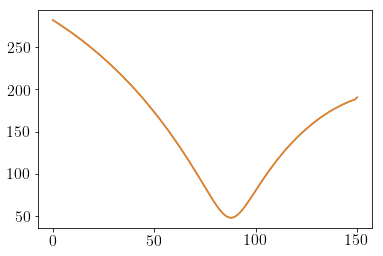

In [9]:
plot(R_gal5_ics34)
plot(R_gal5_ics35)